# FRE7773 - Machine Learning in Financial Engineering
# Assignment 2
# Please submit the .ipynb file on Brightspace before **16th Nov. 11:59 pm**.

## Models:
1. SVR (regression problem) - 25%
2. Decision Trees - 25%
3. Random Forests - 50%

### General Guidelines:
1. You can choose the same or different financial applications for each model.
2. All your work, from explanations to code and analysis, should be presented within a
single Jupyter notebook.
3. While reusing content from other sources is allowed, always ensure you provide
appropriate citations and references.
4. This is an individual assignment. Adhere strictly to NYU’s policy on plagiarism. Late
submissions will not be accepted and will result in a deduction of 10 points (if late more
than 24h, will result in a deduction of 20 points).

### Key Emphasis:
While accuracy is valuable, a descriptive, clear, and convincing implementation and analysis of
your models hold greater weight in this assignment.

In [3]:
#install the package if needed
! pip install -U imbalanced-learn
! pip install scikit-learn
! pip install seaborn
! pip install yfinance
! pip install quandl # not necessarily
!pip install graphviz
!pip install pandas-ta


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import quandl
import graphviz
import pandas_ta as ta

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVR
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree


# 1. SVR

## Introduction:

- **Problem Statement**:
  - **Problem**: The task at hand involves predicting the stock price of Philips, a company listed on the US stock market, using Support Vector Regression (SVR).
  - **Other Solutions and ML Model Choice**: Traditional time series forecasting methods, such as ARIMA, have been commonly employed for stock price prediction. However, SVR is chosen for its ability to capture non-linear relationships in the data and handle complex patterns. SVR is particularly suitable for predicting stock prices, as stock market data often exhibits non-linear behavior influenced by various factors.


- **Data Description**:
  - **Dataset**: The dataset comprises Philips' stock price data from the US stock market. Data covers a period of ten years, from April 12, 2016, to April 12, 2016. The data is sourced from Yahoo Finance, a reliable and widely used platform for obtaining financial market data.here's the Link to the Dataset: https://finance.yahoo.com/quote/PHG?.tsrc=fin-srch
  - **Variables**:
    - Dependent Variable (Target):The closing price of Philips' stock on a given trading day. This serves as the target variable that the SVR model aims to predict. The closing price represents the final price level at the end of the trading session and is often used as a key indicator of a stock's performance.
    - Independent Variables (Features)inclue the open, high,low and the volume.
  
- **Data preprocessing steps include**:
  - Downloading the historical stock prices for the specified period.
  - Cleaning the data by checking for and handling missing values, ensuring there are no gaps in the time series data.
  - Normalizing the data

## Implementation


In [8]:
# Loading the stock price data from April 12, 1996, to April 12, 2016
df = yf.download('PHG', start='2006-04-12', end='2016-04-12')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-04-12,32.689999,32.849998,32.549999,32.650002,20.162374,563800
2006-04-13,32.500000,32.810001,32.369999,32.750000,20.224127,1439600
2006-04-17,32.349998,33.090000,32.349998,32.910000,20.322933,1179400
2006-04-18,32.610001,32.880001,32.209999,32.639999,20.156199,2561600
2006-04-19,33.330002,34.060001,33.330002,33.980000,20.983688,905800


In [9]:
# Adjust index and columns
df.index = pd.to_datetime(df.index)
df.index = df.index.strftime('%Y-%m-%d')
df.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']

df.head()

,open,high,low,close,adj close,volume
Date,,,,,,
2006-04-12,32.689999,32.849998,32.549999,32.650002,20.162374,563800
2006-04-13,32.500000,32.810001,32.369999,32.750000,20.224127,1439600
2006-04-17,32.349998,33.090000,32.349998,32.910000,20.322933,1179400
2006-04-18,32.610001,32.880001,32.209999,32.639999,20.156199,2561600
2006-04-19,33.330002,34.060001,33.330002,33.980000,20.983688,905800


## Task 1: Feature Engineering
In this task, you are going to generate 5 features by using the package called 'pandas_ta'. Please follow the instructions below.

1. **EMA (Exponential Moving Average):**  
   - EMA is a type of moving average that places more weight on recent close price. It's calculated based on the previous EMA value and the current close price. EMA can smooth out price data, making it easier to identify trends and potential reversal points. Using EMA as a feature in the model can capture the trend behavior.
   
2. **ATR (Average True Range):**  
   - ATR measures market volatility by considering the trading range of an asset over a specified period. It's typically used to set stop-loss levels and to determine the size of positions. ATR provides insights into market volatility, which can help adjust risk management strategies. Higher volatility might indicate larger potential price movements, which could be useful for predicting market direction.

3. **ADX (Average Directional Index):**  
   - ADX quantifies the strength of a trend, regardless of its direction. It's derived from the smoothed averages of positive and negative directional movements. ADX helps in identifying the strength of a trend, which is valuable information for trend-following strategies. A strong trend, as indicated by a high ADX value, might imply higher confidence in trend-based predictions.

4. **RSI (Relative Strength Index):**  
   - RSI measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the market. It's expressed as a value between 0 and 100. RSI helps identify potential reversal points due to overbought or oversold conditions. Extreme RSI values might indicate a possible trend reversal, providing signals for entry or exit points in trading strategies.

5. **MACD (Moving Average Convergence Divergence):**  
   - MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security's price. It consists of MACD line, signal line, and MACD histogram. MACD provides signals for trend changes and momentum shifts. Crossovers between the MACD line and signal line, as well as divergences between MACD and price, can signal potential entry or exit points in trading strategies.

Each of these indicators captures different aspects of market behavior, including trend direction, volatility, trend strength, and momentum. By incorporating them as features in the machine learning models, we aim to leverage these insights to improve the predictive accuracy of our models.

In [11]:
# Write your code here.
# For example
df['EMA'] = ta.ema(df['close'], length=10)
df['ATR'] = ta.atr(df['high'], df['low'], df['close'], length=14)
df['ADX'] = ta.adx(df['high'], df['low'], df['close'], length=14)['ADX_14']
df['RSI'] = ta.rsi(df['close'], length=14)

macd = ta.macd(df['close'])
df['MACD'] = macd['MACD_12_26_9']
df['MACD_signal'] = macd['MACDs_12_26_9']
df['MACD_hist'] = macd['MACDh_12_26_9']

df = df.dropna()
df.head()

,open,high,low,close,adj close,volume,EMA,ATR,ADX,RSI,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,
2006-05-31,31.510000,31.629999,31.230000,31.610001,19.520142,898300,31.564007,0.691865,30.289270,42.984639,-0.772769,-0.900122,0.127353
2006-06-01,31.150000,32.070000,31.139999,32.060001,19.798031,1055400,31.654188,0.710363,28.569450,48.178796,-0.683355,-0.856769,0.173413
2006-06-02,32.389999,32.410000,31.660000,31.959999,19.736279,892000,31.709790,0.713423,26.301835,47.150795,-0.613492,-0.808113,0.194622
2006-06-05,31.530001,31.600000,30.879999,30.910000,19.087872,492800,31.564373,0.741560,25.581306,37.985963,-0.635524,-0.773596,0.138071
2006-06-06,30.530001,30.530001,30.020000,30.379999,18.760578,727700,31.349033,0.752893,26.027455,34.355939,-0.687823,-0.756441,0.068618


### Task 2: Train-Test Split

*   This step involves splitting the dataset into training and testing sets. The training set is used to train the SVR model, while the testing set is used to evaluate the model's performance. Make sure to separate the target variable, and the independent variables before you split the dataset.
*   You can use The scikit-learn 'train_test_split' function with train:test = 80:20






In [13]:
# Write your code here
# Define independent variables (features) and the target variable
X = df[['open', 'high', 'low', 'adj close', 'volume', 'EMA', 'ATR', 'ADX', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']]
y = df['close']

# Split the dataset into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Task 3: Data Normalization
*   Performing normalization to scale the training and test dataset, which helps improve the convergence speed and performance of the SVR algorithm.


In [15]:
# Write your code here
# Normalize the training and testing datasets using MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

### Task 4: Train 2 SVR models


*   Train two SVR models with different kernels (linear and polynomial) using the training data.
*   Evaluate their performance based on the predictions using the test data. Clearly explain the metrics you are using.
*   Discussion: 1) Why the model did good or bad job for this specific problem and dataset? 2) Delve into the pros and cons of the model, commenting on potential overfitting, or other relevant observations.





In [17]:
# Write your code here
# Train two SVR models with different kernels
# 1. SVR with linear kernel
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train_normalized, y_train)
y_pred_linear = svr_linear.predict(X_test_normalized)

# 2. SVR with polynomial kernel
svr_poly = SVR(kernel='poly', degree=2)
svr_poly.fit(X_train_normalized, y_train)
y_pred_poly = svr_poly.predict(X_test_normalized)

# Evaluate the performance of both models using Mean Squared Error (MSE) and R-squared (R2)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [18]:
print("SVR with Linear Kernel:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}\n")

print("SVR with Polynomial Kernel:")
print(f"Mean Squared Error: {mse_poly}")
print(f"R-squared: {r2_poly}\n")

SVR with Linear Kernel:
Mean Squared Error: 0.038582681988956626
R-squared: 0.9991823927999604

SVR with Polynomial Kernel:
Mean Squared Error: 0.3699320100082971
R-squared: 0.9921607555691824



### Discussion
1. The linear SVR model assumes a linear relationship between the features and the target, which might not fully capture the non-linear nature of stock price movements. This could result in suboptimal performance, especially if the relationships between the features and the target are more complex.On the other hand, the polynomial SVR model attempts to capture these non-linear relationships
2. pros and cons
SVR with Linear Kernel:
Pros: Simpler model, lower risk of overfitting, faster training.
Cons: May not capture complex, non-linear relationships in the data, leading to lower accuracy.
SVR with Polynomial Kernel:
Pros: Better ability to capture non-linear relationships, potentially higher accuracy.
Cons: Higher risk of overfitting, especially with higher polynomial degrees, increased training time.


Potential Overfitting Observation：The polynomial SVR model might overfit the training data, as it attempts to fit non-linear relationships 


# 2. Decision tree


## Introduction

**Problem Statement:**
- The financial world is characterized by its complexity and volatility, making accurate predictions a crucial aspect of decision-making. In this project, we aim to tackle the challenge of forecasting market behavior using machine learning techniques, focusing specifically on the application of decision tree algorithms. The primary problem we seek to address is the prediction of market trends, which involves discerning whether the market will rise or fall based on historical data and technical indicators.

- Traditional methods of market analysis often rely on human intuition and simplistic models, which may not capture the intricate patterns present in financial data. Machine learning (ML) models offer a promising alternative by leveraging algorithms to uncover hidden insights and make data-driven predictions. Among various ML approaches, decision tree algorithms stand out for their ability to handle complex decision-making processes and provide interpretable results.

- The solution empowers investors and traders with valuable insights to make better decisions in financial markets. With the predictive models, users can strategically manage their investments, optimize portfolio allocations, and time their trades more effectively. For example, by leveraging analysis, traders can identify opportune moments to buy or sell stocks like Apple, potentially maximizing profits while minimizing risks. Ultimately, the model provides actionable intelligence, enabling users to navigate markets with confidence and achieve their financial goals.


**Data Description:**

- The dataset used in this project consists of daily market data for the Emini S&P500 index spanning over 20 years, directly downloaded from quandl. The data includes features such as opening price, closing price, highest price, lowest price, and trading volume. These features are recorded at regular intervals, providing a comprehensive time series dataset for analysis.

- The relevant technical indicators, including Exponential Moving Average (EMA), Average True Range (ATR), Average Directional Index (ADX), Relative Strength Index (RSI), and Moving Average Convergence Divergence (MACD), are computed from the market data to serve as predictors for the decision tree models.

- The target variable for classification tasks is derived from the daily returns of the market, categorizing whether the market will rise or fall based on predefined thresholds.

## Implementation

In [23]:
# All features have been saved in 'zhl.csv'.
# You can find this file on Brightspace
# Load the file

df = pd.read_csv('/Users/charlie/Desktop/NYU2024 fall/7773/HW/HW2/zhl.csv')
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal
5981,3937.50,3960.25,3913.00,3956.75,25.50,3958.25,1962578.0,1074588.0,3888.845380,3854.728033,67.948613,15.367395,61.385366,22.341798,13.495622
5982,3957.75,3970.75,3942.75,3957.50,-5.75,3952.50,1963102.0,1872176.0,3900.418947,3861.035901,65.095140,14.628503,60.581439,26.192142,16.034926
5983,3957.25,3973.50,3925.00,3961.25,11.00,3963.50,1922176.0,2334286.0,3911.888230,3867.646488,63.909773,13.605031,61.617057,29.787800,18.785501
5984,3962.00,3978.50,3900.50,3910.50,-57.50,3906.00,2096466.0,2499994.0,3910.817642,3870.120909,64.916218,13.153586,53.678224,27.678555,20.564112
5985,3910.75,3923.50,3875.00,3896.75,-6.25,3899.75,1986486.0,2556702.0,3908.805344,3872.032463,63.743631,13.216574,52.880689,25.212012,21.493692


**Feature Engineering**


1.   'ClgtEMA10' stands for close larger than 10-day EMA. If Settle is greater than 10-day EMA, it assigns a 1. Otherwise, the value is -1. This feature indicates whether the settlement price is above or below the short-term moving average, which can help identify short-term price trends.

2.   'EMA10gtEMA30' stands for 10-day EMA larger than 30-day EMA. If EMA10 is greater than EMA30, it assigns a 1. Otherwise, it assigns a -1. This feature indicates whether the short-term trend (10-period EMA) is above the longer-term trend (30-period EMA), which can be a sign of a potential upward trend. If the 10-period EMA is below the 30-period EMA, it may indicate a potential downward trend.

3. 'MACDSIGgtMACD' stands for 'MACD Signal greater than MACD'. If MACD Signal is greater than MACD line, it assigns a 1. Otherwise, it assigns a -1. This feature helps identify changes in momentum. In MACD analysis, when the MACDsignal is above the MACD line, it is often considered a bearish signal (indicating potential price decreases), while the opposite can indicate a bullish signal.



In [25]:
# Feature Engineering

df['ClgtEMA10'] = np.where(df['Settle'] > df['EMA10'], 1, -1)
df['EMA10gtEMA30'] = np.where(df['EMA10'] > df['EMA30'], 1, -1)
df['MACDSIGgtMACD'] = np.where(df['MACDsignal'] > df['MACD'], 1, -1)

In [26]:
 # Create binary target variables based on whether the next day's return is positive or negative
df['Return'] = df['Settle'].pct_change(1).shift(-1)
df['target_cls'] = np.where(df.Return > 0, 1, 0)

## Task 1: Train-Test Split


*   Prepare the dataset for decision tree models, including predictor variables and target variables.
Predictor variables should include technical indicators such as ATR, ADX, RSI, ClgtEMA10, EMA10gtEMA30, MACDSIGgtMACD.
*   Split the data into training and testing datasets to evaluate the performance of the models on unseen data.




In [28]:
# Write your code here.
# Define predictor variables and target variable for decision tree model
decision_tree_features = ['ATR', 'ADX', 'RSI', 'ClgtEMA10', 'EMA10gtEMA30', 'MACDSIGgtMACD']
X_dt = df[decision_tree_features]
y_dt = df['target_cls']

# Drop rows with NaN values
X_dt = X_dt.dropna()
y_dt = y_dt[X_dt.index]

# Split the dataset into training and testing sets (80:20 ratio)
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

## Task 2: Train Decision Tree Model

*   Initialize the decision tree classifier with specified parameters (e.g., criterion, max_depth, min_samples_leaf) and fit it to the training data.


*   Use cross-validation to search for the optimal combination of hyperparameters on validation sets.




In [30]:
# Write your code here.
# Train Decision Tree Classifier
# Initialize the Decision Tree Classifier with specified parameters
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=10, random_state=42)
dt_classifier.fit(X_train_dt, y_train_dt)

# Use cross-validation to search for the optimal combination of hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [5, 10, 20]
}
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_dt, y_train_dt)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters found by GridSearchCV:")
print(best_params)

# Evaluate the model with the best parameters on the test set
best_dt_classifier = grid_search.best_estimator_
y_pred_dt = best_dt_classifier.predict(X_test_dt)

Best parameters found by GridSearchCV:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}


## Task 3: Model Evaluation


* Make predictions on the testing dataset to evaluate the performance of your classification model. Clearly explain the metrics you are using.
* Discussion: 1) Why the model did good or bad job for this specific problem and dataset? 2) Delve into the pros and cons of the model, commenting on potential overfitting or other relevant observations.



In [32]:
# Write your code here.
# Model Evaluation
# Calculate accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test_dt, y_pred_dt)
conf_matrix = confusion_matrix(y_test_dt, y_pred_dt)
class_report = classification_report(y_test_dt, y_pred_dt)

In [33]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.5369127516778524
Confusion Matrix:
[[  1 552]
 [  0 639]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       553
           1       0.54      1.00      0.70       639

    accuracy                           0.54      1192
   macro avg       0.77      0.50      0.35      1192
weighted avg       0.75      0.54      0.38      1192



## Discussion
1.  The decision tree model's performance depends on the complexity of the financial market data. The model may do a good job when the features clearly separate the classes, but financial data is inherently noisy, and the relationships between features and the target are often non-linear and complex. 
The chosen features may not fully capture the underlying market behavior, which could contribute to the model's inability to make accurate predictions.
2.  Pros and Cons
Pros: Decision trees are easy to interpret and visualize. They can handle both numerical and categorical data and do not require feature scaling.
Cons: Decision trees are prone to overfitting, especially when the model is too deep. Financial market data is highly volatile, and decision trees may struggle to generalize well to unseen data due to the noise present in the dataset.

Potential Overfitting Observation：The decision tree model may overfit the training data, especially if the depth is too high. This would lead to a model that performs well on training data but poorly on the test set. Particularly with highly complex or noisy datasets like financial data.

# 3. Random Forest From Scratch





*   The main objective of this part is to study the overfitting problem encountered in Decision Trees.
*   Task 1: Try to train a really deep decision tree. Use this model as an example to illustrate why overfitting happens.

*  Task 2: Train a Random Forests model based on the same train data in
Problem 2 - Decision Tree. Compared with the previous model, do Random Forests perform better or worse on the same test data and why?

* Task 3: Perform an ablation study to investigate how varying the number of decision trees affects the performance of a Random Forest model.
Visualize your results by plotting the number of decision trees against the metric used to assess the model performance, and comment your findings.




In [37]:
# Write your code here.
# Task 1: Train a really deep decision tree to illustrate overfitting
deep_dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, random_state=42)
deep_dt_classifier.fit(X_train_dt, y_train_dt)

# Evaluate the deep decision tree on the test set
y_pred_deep_dt = deep_dt_classifier.predict(X_test_dt)
accuracy_deep_dt = accuracy_score(y_test_dt, y_pred_deep_dt)
print("Deep Decision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_deep_dt}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_dt, y_pred_deep_dt))
print("Classification Report:")
print(classification_report(y_test_dt, y_pred_deep_dt))

Deep Decision Tree Model Evaluation:
Accuracy: 0.5075503355704698
Confusion Matrix:
[[269 284]
 [303 336]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.49      0.48       553
           1       0.54      0.53      0.53       639

    accuracy                           0.51      1192
   macro avg       0.51      0.51      0.51      1192
weighted avg       0.51      0.51      0.51      1192



### Discussion on Overfitting

As seen in the evaluation results, the deep decision tree achieved an accuracy of around 50.76% on the test set, which indicates poor generalization. The confusion matrix shows that the model struggles to differentiate between the two classes, with a high number of misclassifications for both positive and negative cases. The classification report also reflects the model's poor performance, with precision, recall, and F1-scores around 0.51, indicating that the model is not effectively learning generalizable patterns.

Overfitting occurs because the model captures not only the underlying patterns but also the noise in the training data, leading to poor generalization to unseen data. The deep decision tree is likely to have a high training accuracy but performs poorly on the test set, as it fails to generalize well to new, unseen data. 

In [39]:
# Task 2: Train a Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_leaf=1, random_state=42)
rf_classifier.fit(X_train_dt, y_train_dt)

# Evaluate the Random Forest model on the test set
y_pred_rf = rf_classifier.predict(X_test_dt)
accuracy_rf = accuracy_score(y_test_dt, y_pred_rf)
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_dt, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test_dt, y_pred_rf))

Random Forest Model Evaluation:
Accuracy: 0.5109060402684564
Confusion Matrix:
[[236 317]
 [266 373]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.43      0.45       553
           1       0.54      0.58      0.56       639

    accuracy                           0.51      1192
   macro avg       0.51      0.51      0.50      1192
weighted avg       0.51      0.51      0.51      1192



### Discussion on Random Forest Performance
Compared to the deep decision tree, the Random Forest model is less prone to overfitting because it aggregates the results from multiple decision trees, each trained on different subsets of the data. As seen in the evaluation results, the Random Forest model achieved an accuracy of around 51.09%, which is slightly better than the deep decision tree's accuracy of 50.76%. The confusion matrix shows that the Random Forest model reduces the number of misclassifications compared to the deep decision tree, particularly for class 1. The classification report indicates slightly better recall and F1-score for class 1, suggesting that the Random Forest model is better at identifying the positive class.

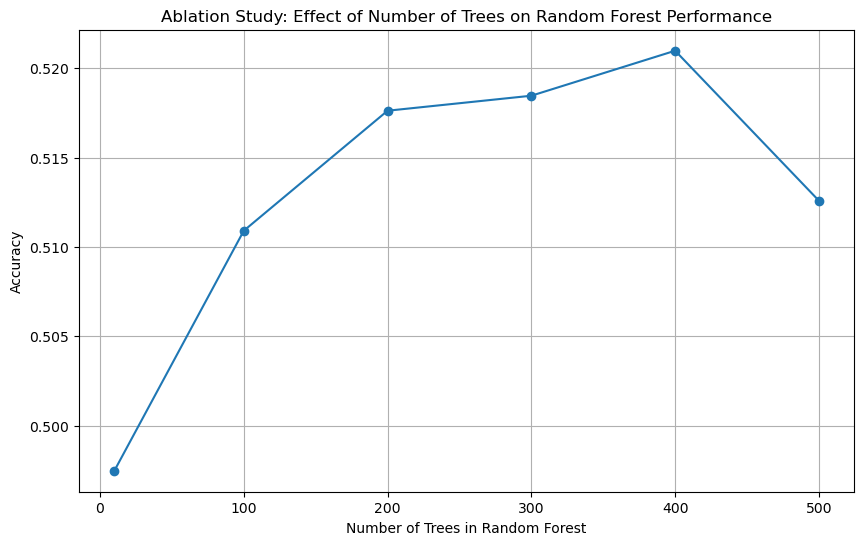

In [41]:
# Task 3: Ablation Study - Varying Number of Trees in Random Forest
num_trees = [10,100,200,300,400,500]
accuracies = []

for n in num_trees:
    rf = RandomForestClassifier(n_estimators=n, criterion='gini', max_depth=None, min_samples_leaf=1, random_state=42)
    rf.fit(X_train_dt, y_train_dt)
    y_pred = rf.predict(X_test_dt)
    accuracies.append(accuracy_score(y_test_dt, y_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(num_trees, accuracies, marker='o')
plt.xlabel('Number of Trees in Random Forest')
plt.ylabel('Accuracy')
plt.title('Ablation Study: Effect of Number of Trees on Random Forest Performance')
plt.grid(True)
plt.show()

### Discussion on Ablation Study
As observed in the plot, the accuracy initially increases with the number of trees, reaching a peak at around 400 trees, with an accuracy slightly above 52%. Beyond this point, the accuracy declines when the number of trees reaches 500.

This trend suggests that while increasing the number of trees generally helps improve accuracy by reducing variance and enhancing generalization, there is a point where the model may become overly complex, leading to diminished returns or even a slight reduction in accuracy. The slight decline at 500 trees could be due to overfitting or the increased difficulty in averaging a large number of models, which might start capturing noise rather than useful patterns. 